In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

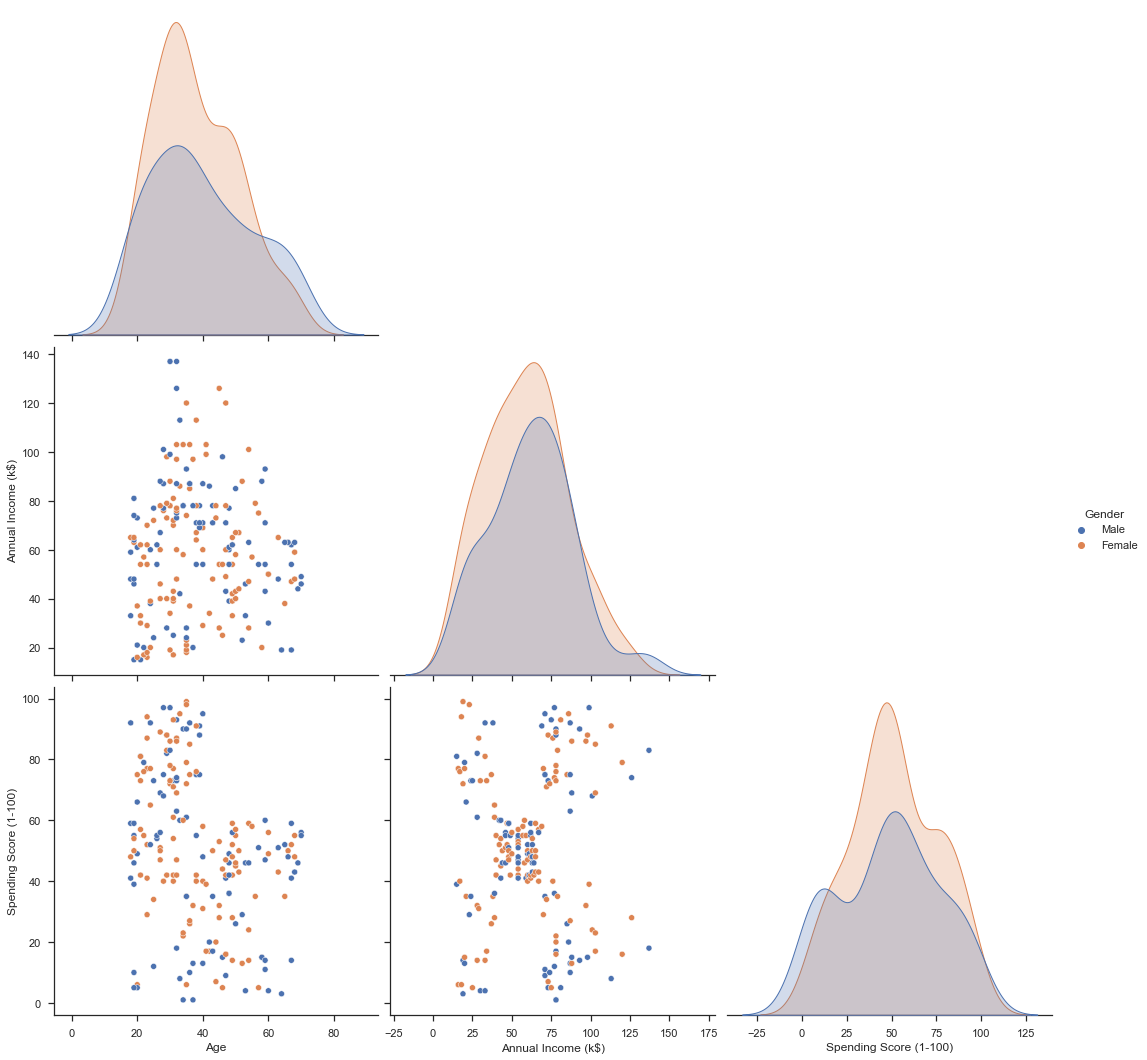

In [4]:
df1=df.drop('CustomerID',axis=1)

sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(df1,hue='Gender',diag_kind='kde' #상관계수가 1이면 분포로 표시
             ,corner=True # 대각선을 기준으로 한곳만 남기기
             ,height=5)
plot_kws={'s':100}
plt.show()

In [5]:
# Gender 가변수 처리
df2=pd.get_dummies(df1,columns=['Gender'],drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [6]:
# 데이터 정규화
MinMaxScaler=MinMaxScaler()
df_minmax=MinMaxScaler.fit_transform(df2)

# 컬럼명 결합
df_minmax=pd.DataFrame(data=df_minmax,columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


* k-means clustering DBSCAN 모두 거리 기반의 군집화 알고리즘이므로 정규화 스케일링 적용

In [7]:
# Build a k-means clustering model

kmeans_model_1=KMeans(
init='k-means++',
n_clusters=3,
n_init=10,
max_iter=300,
random_state=37)

kmeans_model_1.fit(df_minmax)

# 최저 SSE값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)

# 반복횟수
print(kmeans_model_1.n_iter_)

29.552857611943857
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
2


C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


* init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
    Method for initialization:

     * ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

     * ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

     * If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

     * If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

* n_init: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택

* 중심점이 밀집되지 않도록 하는 k-means++로 설정
* n_clusters 옵션으로 3개의 중심수 설벙
* 초기 중심위치 시도 횟수 n_init:10
* 각 중심점의 위치정보는 사용된 변수가 4개이기 때문에 4차원으로 표현

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

<AxesSubplot:>

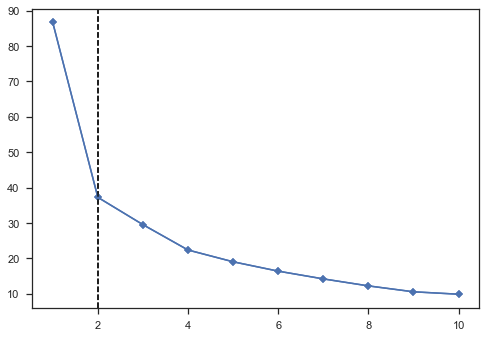

In [8]:
# 엘보우 차트

# Kmeans 모델과 클러스터 수 범위를 설정 후 Elbow 차트 생성
Elbow_Chart=KElbowVisualizer(kmeans_model_1,k=(1,11),timings=False)

# 데이터를 모델에 맞춰 학습
Elbow_Chart.fit(df_minmax)

# 시각화 결과를 그림
Elbow_Chart.draw()

* 여러 클러스터 수에 대해 'k-means'모델을 훈련하고 각 클러스터 수에 대한 관성(inertia)을 측정

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

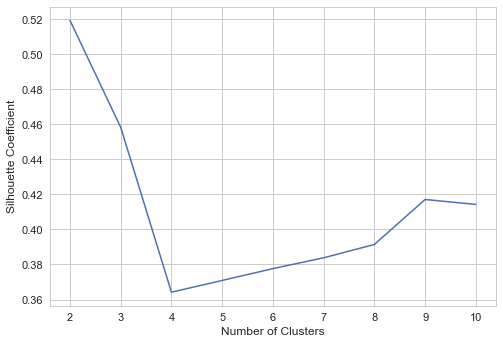

In [9]:
# 실루엣 계수 시각화 1

# k-means model
kmeans_model_2={
    'init':'k-means++',
    'n_init':10,
    'max_iter':300,
    'random_state':37
}

# 각 k의 실루엣 계수 저장
silhouette_coef=[]

# 그래프생성
for k in range(2,11):
    kmeans_silhouette=KMeans(n_clusters=k,**kmeans_model_2) #kmeans_model_2 매개변수 사용
    kmeans_silhouette.fit(df_minmax) #현재 클러스터 수로 모델 훈련
    
    # 클러스터 내의 샘플이 얼마나 비슷한지(높은 점수), 클러스터 간의 거리가 얼마나 떨어져 있는지(낮은 점수)를 나타태는 지표
    score=silhouette_score(df_minmax,kmeans_silhouette.labels_)
    
    # kmeans_silhouette.labels_
    # 모델을 훈련한 후 각 데이터 포인트가 속한 클러스터를 나타내는 레이블을 포함한 배열
    # 각 데이터 포인트가 어떤 클러스터에 속하는지를 나타내며, 각 데이터 포인트에 대해 클러스터의 인덱스 또는 번호로 표시된다.
    # 이 레이블 정보는 클러스터링 결과를 분석하고 시각화하는데 사용된다.
    
    silhouette_coef.append(score)
    
plt.style.use('seaborn-whitegrid')
plt.plot(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to 

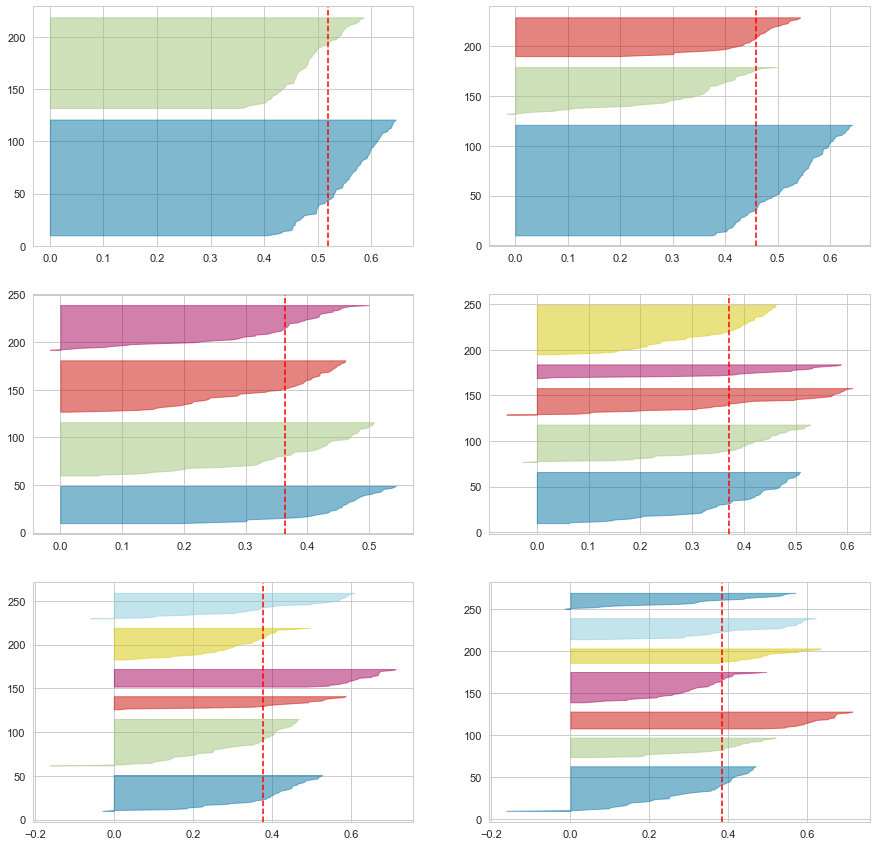

In [10]:
# 실루엣 계수 시각화2

fig,ax=plt.subplots(3,2,figsize=(15,15))
for i in [2,3,4,5,6,7]:
    # k-means model
    kmeans_model_3=KMeans(n_clusters=i,
                         init='k-means++',
                         n_init=10,
                         max_iter=300,
                         random_state=37)
    
    q,mod=divmod(i,2) #i를 2로 나눈 몫과 나머지를 튜플로 반환 (q:몫 mod:나머지)
    # subplot의 row와 column위치를 계산
    
    # visualization
    visualizer=SilhouetteVisualizer(kmeans_model_3,
                                   colors='yellowbrick',
                                   ax=ax[q-1][mod])
    
    visualizer.fit(df_minmax)

* SilhouetteVisualizer()을 통해 각 군집별 실루엣 계수 분포를 상세하기 확인

C:\Users\15Z980-GA7JK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


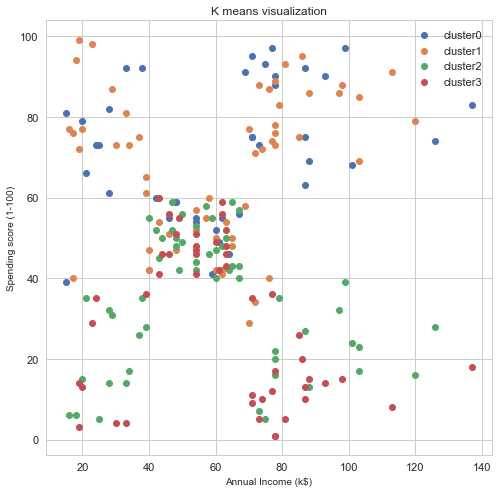

In [11]:
# k-means 클러스터 시각화

# k-means model
kmeans_model_4=KMeans(
init='k-means++',
n_clusters=4,
n_init=10,
max_iter=300,
random_state=37)

# 군집번호 결합
df2['cluster1']=kmeans_model_4.fit_predict(df_minmax)

# 시각화
plt.figure(figsize=(8,8))
for i in range(0,df2['cluster1'].max()+1):
    plt.scatter(df2.loc[df2['cluster1']==i,'Annual Income (k$)'],
               df2.loc[df2['cluster1']==i,'Spending Score (1-100)'],
               label='cluster'+str(i))
    
plt.legend()
plt.title('K means visualization',size=12)
plt.xlabel('Annual Income (k$)',size=10)
plt.ylabel('Spending score (1-100)',size=10)
plt.show()

* 성별, 연령 등 다른변수가 있기 때문에 두 가지 변수로만 군집이 잘 나뉘어졌는지 확인하는것은 옳지 않음
* 단지, 대략적인 분포를 확인하기 위해 참고

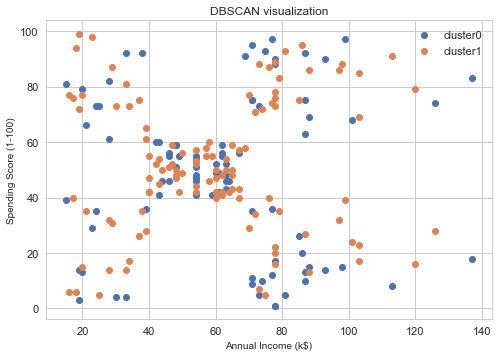

In [12]:
# DBSCAN 모델 생성 및 시각화

# DBSCAN
DBSCAN_model=DBSCAN(eps=0.7, # 관측치간 거리 설정
                    min_samples=5 # 최소 관측치 수 설정
                   )

# 군집화 모델 학습 및 클러스터 예측결과 반환
DBSCAN_model.fit(df_minmax)
df2['cluster2']=DBSCAN_model.fit_predict(df_minmax)

#시각화
for i in range(0,df2['cluster2'].max()+1):
    plt.scatter(df2.loc[df2['cluster2']==i,'Annual Income (k$)'],
               df.loc[df2['cluster2']==i,'Spending Score (1-100)'],
               label='cluster'+str(i))
    
plt.legend()
plt.title('DBSCAN visualization',size=12)
plt.xlabel('Annual Income (k$)',size=10)
plt.ylabel('Spending Score (1-100)',size=10)
plt.show()

In [13]:
# k-means 군집별 특성 확인

df_kmeans=df2.groupby(['cluster1']).agg({'Age':'mean',
                                       'Annual Income (k$)':'mean',
                                       'Spending Score (1-100)':'mean',
                                       'Gender_Male':'mean'}).reset_index()

df_kmeans['cnt']=df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,28.250000,62.000000,71.675000,1.0,40
1,1,28.438596,59.666667,67.684211,0.0,57
2,2,48.109091,58.818182,34.781818,0.0,55
3,3,49.437500,62.416667,29.208333,1.0,48


* 성별에 따라 0,3:남성 1,2:여성
* 각 군집은 연령과 구매스코어에 큰 차이를 보인다.

In [14]:
# DBSAN 군집별 특성 확인

df_DBSCAN=df2.groupby(['cluster2']).agg({'Age':'mean',
                                       'Annual Income (k$)':'mean',
                                       'Spending Score (1-100)':'mean',
                                       'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt']=df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112


* 성별에 따라 두 개의 군집으로 나누어진다.
    * 성별은 더미변수이기 때문에 변별력이 강해서 다른 변수의 영향력을 압도한 것으로 보인다.
    * 비즈니스적으로 의미 있는 군집을 만들기 위해 성별 변수를 제거하거나 다른 변수를 추가해야한다.